# LOB-Bench Tutorial Notebook

For detailed documentation, please see the README file. 
We start by importing the required modules

In [ ]:
%load_ext autoreload
%autoreload 2

### Data Download
The downloading of generated sample data based on publicly available LOBSTER data. For proper model training and generation, LOBSTER access is required. However, this allows for a demonstration of the benchmark functionality. Most plots will be different to that expected due to this public data containing only a single day.

Note that this data-set is very small and is likely to give erroneous behaviour in the below plots. It serves merely as an illustrative example which allows for execution of the codebase.

In [ ]:
import urllib.request
url = 'https://drive.google.com/uc?id=1b5FskJykGbWvVwKd7YhzRwEf0YIcmOR9&export=downloads'
filename = 'test.zip'
urllib.request.urlretrieve(url, filename)

In [ ]:
import zipfile
with zipfile.ZipFile("test.zip", 'r') as zip_ref:
    zip_ref.extractall("sample_data/")

## Run the benchmark

The benchmark consists of 3 seperate files, they default to using the sample data which is downloaded above, but this can be configured.

### Run Benchmark calculations for scoring.

This first file calculates all the scores and saves them in a directory (configurable) which will be used for plotting. Various config options exist to calculate only conditional, unconditional, or divergence scores. 

In [1]:
%run -i 'run_bench.py'

*** 	The assumed file structure for files in this package is:
***	 	 {DATA_DIR}/{MODEL}/{STOCK}/data_*
***	whereby DATA_DIR is passed as an argument when launching the script
***	{MODEL}s and {STOCK}s may either be passed as a str or a list of str
***	The script will iterate over all combinations of models and stocks

[*] Loading generated data from ./sample_data/data_saved/large_model_sample/GOOG


128it [00:00, 373.16it/s]


[*] Running unconditional scoring
Calculating scores and metrics for:  spread
Calculating scores and metrics for:  orderbook_imbalance
Calculating scores and metrics for:  log_inter_arrival_time
Calculating scores and metrics for:  log_time_to_cancel
Calculating scores and metrics for:  ask_volume_touch
Calculating scores and metrics for:  bid_volume_touch
Calculating scores and metrics for:  ask_volume
Calculating scores and metrics for:  bid_volume
Calculating scores and metrics for:  limit_ask_order_depth
Calculating scores and metrics for:  limit_bid_order_depth
Calculating scores and metrics for:  ask_cancellation_depth
Calculating scores and metrics for:  bid_cancellation_depth
Calculating scores and metrics for:  limit_ask_order_levels
Calculating scores and metrics for:  limit_bid_order_levels
Calculating scores and metrics for:  ask_cancellation_levels
Calculating scores and metrics for:  bid_cancellation_levels
Calculating scores and metrics for:  vol_per_min
Calculating scor

### Run Plotting 
The second file takes saved scores to plot them. Again the default directories are used. 

[*] Loading data...
[*] Plotting divergence plots


Stock: 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]


[*] Plotting unconditional histograms


Stock: 100%|██████████| 1/1 [07:22<00:00, 442.50s/it]


[*] Plotting conditional histograms


Stock: 100%|██████████| 1/1 [14:21<00:00, 861.91s/it]


[*] Plotting summary stats
{'GOOG': {'large': {'l1': ((0.511477478885212, array([0.50897153, 0.51732943])), (0.5330125246779994, array([0.52746323, 0.54126814])), (array(0.53188735), array([0.52667214, 0.53821553]))), 'wasserstein': ((0.6733311616592702, array([0.66719097, 0.68320983])), (0.650730173795407, array([0.63161987, 0.67396042])), (array(0.65312474), array([0.64648096, 0.66202393])))}}}
[*] Plotting comparison plots
[*] Done


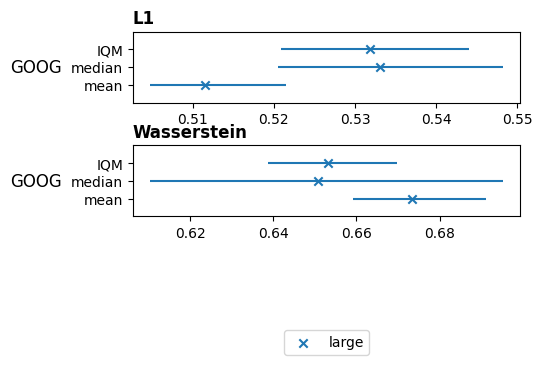

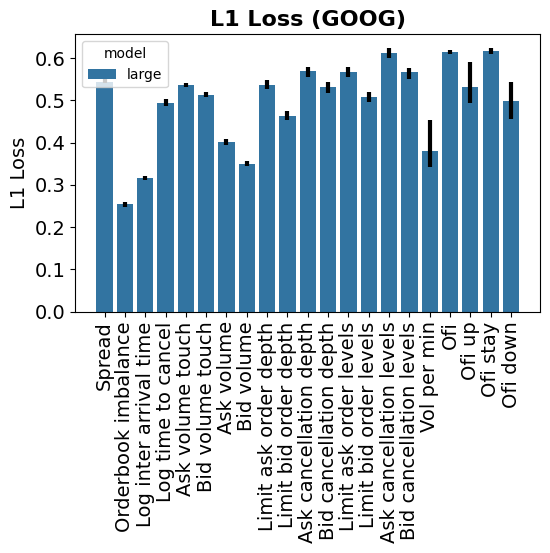

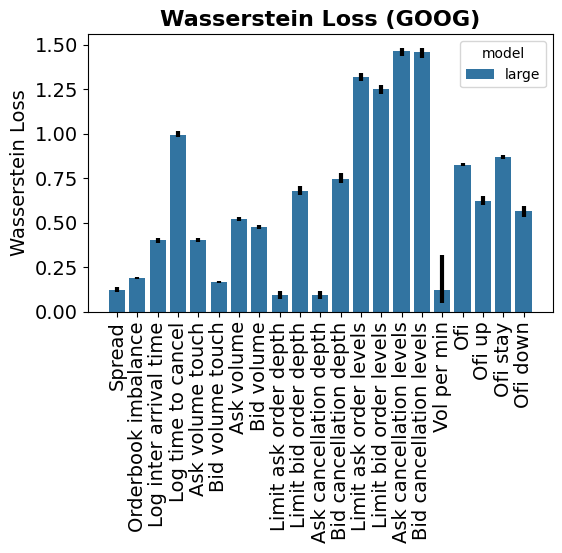

In [2]:
%run -i 'run_plotting.py'

### Run Impact
Finally, the impact study can be calculated and plotted with 'impact.py' Here it is required to give a flag for which parts should be calculated. We propose the micro impact calculation and plotting (this is in the paper).

*** 	The assumed file structure for files in this package is:
***	 	 {DATA_DIR}/{MODEL}/{STOCK}/data_*
***	whereby DATA_DIR is passed as an argument when launching the script
***	{MODEL}s and {STOCK}s may either be passed as a str or a list of str
***	The script will iterate over all combinations of models and stocks

Loading data from ./sample_data/data_saved/large_model_sample/GOOG
Evaluating impact for large_model_sample Model for GOOG


0it [00:00, ?it/s]

128it [00:00, 245.91it/s]


Calculating for event type:  MO_0
Calculating for event type:  MO_1
Calculating for event type:  LO_0
Calculating for event type:  LO_1
Calculating for event type:  CA_0
Calculating for event type:  CA_1
Sum of differences of response function:  nan
Plotting impact for large_model_sample Model for GOOG
The abs diffs are [nan nan nan nan nan nan] for large_model_sample and GOOG.
The mean is nan.
[  1   2   3   3   5   6   7  10  12  15  19  25  31  39  50  63  79 100
 125 158 199] [ 0.          1.88057325  2.80990415  2.80990415  4.32374392  4.85375817
  5.22364086  6.28003384  7.19181034  7.57453416  8.03236098  8.52442529
  8.57390418  8.45163043  8.18424318  8.45668135  8.66849817  9.88603989
  5.68465909  9.78301887 -2.94117647]
[  1   2   3   3   5   6   7  10  12  15  19  25  31  39  50  63  79 100
 125 158 199] [ 4.70256583  4.86858108  5.86233855  5.86233855  6.51686167  7.03457815
  7.23801251  7.82196162  8.17125272  8.59696521  9.02716144  9.60951239
  9.84356602  9.7526738  

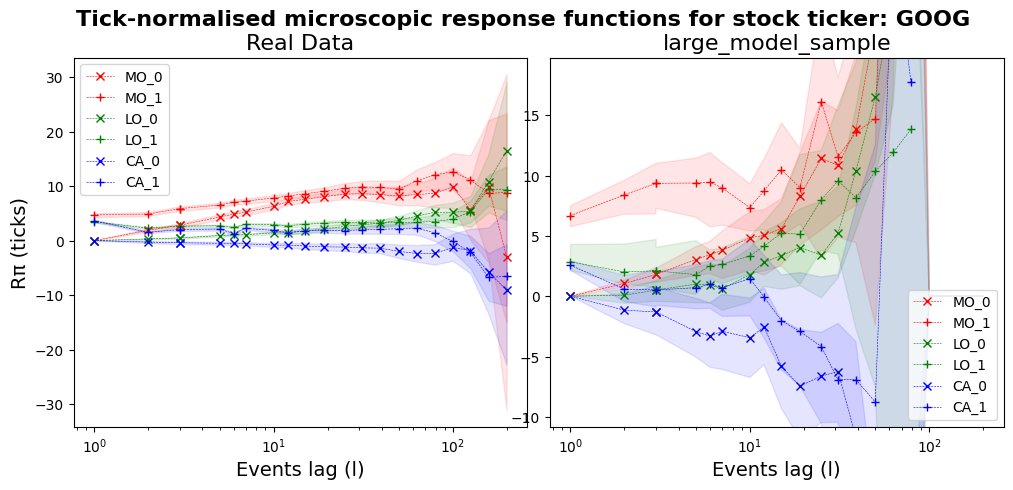

In [9]:
%run -i 'impact.py' '--micro_calculate' '--micro_plot'